### Student Information
Name:黃浩瑋

Student ID: 109020023

GitHub ID: wayne53076

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

# First: Take home exercise

In [150]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [151]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [152]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [153]:
# Answer here
for i in range(3):
    print(str(i)+'----------------')
    print("\n".join(twenty_train.data[i].split("\n")))

0----------------
From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

1----------------
From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:


In [154]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [155]:
# add category to the dataframe
X['category'] = twenty_train.target

In [156]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [157]:
#Answer here
X.iloc[5:10, 2:3]

,category_name
5,soc.religion.christian
6,soc.religion.christian
7,sci.med
8,sci.med
9,sci.med


列出類別是sci.med和comp.graphics的前十個

In [158]:
X.loc[ (X['category_name']=='sci.med') | (X['category_name']=='comp.graphics') ][:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",2,sci.med
23,From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...,1,comp.graphics


In [159]:
X.loc[ X['category'].isin([1,2]) ][:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",2,sci.med
23,From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...,1,comp.graphics


In [160]:
X.query('category > 0 and category <3')[:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",2,sci.med
23,From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...,1,comp.graphics


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [161]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [162]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Answer: C,D,F是字串，不會被isnull()判定為NA

In [163]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

(2257, 3)


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

Answer: X的row的數量減少到1000個，且index不再是由小排到大

In [164]:
# Answer here
len(X_sample)
X_sample[:10]

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
535,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
809,From: JEK@cu.nih.gov Subject: Thinking about h...,3,soc.religion.christian
2002,From: asket@acad2.alaska.edu Subject: When is ...,3,soc.religion.christian
2166,Subject: XLib and 24 Bit Displays [Info Needed...,1,comp.graphics
1272,From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...,2,sci.med


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

Text(0.5, 1.0, 'Category distribution')

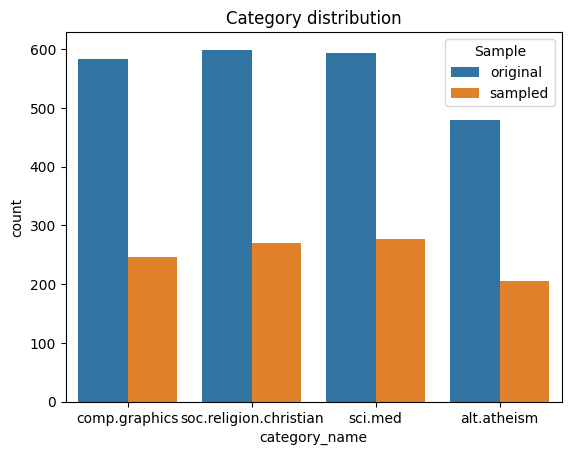

In [165]:
# Answer here
import seaborn as sns
origin = X.copy()
sample = X_sample.copy()
origin['Sample'] = 'original'
sample['Sample'] = 'sampled'
df_combine = pd.concat([origin, sample])
ax = sns.countplot(data=df_combine,x="category_name", hue="Sample")
ax.set_title('Category distribution')

In [166]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [167]:
'''
LookupError: 
**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
'''
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [168]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])

(2257, 35788)
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [169]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [170]:
# Answer here
for i in range(99):
    if X_counts[4,i] != 0:
        print(count_vect.get_feature_names_out()[i])

00
01


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

一開始先選取所有col，接著計算每個term在前20個文件出現的總和，如果頻率大於20就把那個col加入要顯示的list

In [171]:
# Answer here
import matplotlib.pyplot as plt
import numpy as np
exercise_z = np.array(X_counts[0:20, :].toarray()) #X_counts[how many documents, how many terms]
not_sparse_list = []
sum_of_columns = np.sum(exercise_z, axis=0)
for i in range(X_counts.shape[1]):
    if sum_of_columns[i] > 20:
        not_sparse_list.append(i)
print(not_sparse_list)
exercise_z = exercise_z[:, not_sparse_list]
exercise_x = ["term_"+count_vect.get_feature_names_out()[i] for i in not_sparse_list]
exercise_y = ["doc_"+ str(i) for i in range(20)]
print(exercise_x)


[4992, 5410, 5549, 5698, 6298, 7480, 7766, 12014, 12626, 14601, 14887, 15521, 16254, 16302, 16642, 17268, 17556, 18474, 18551, 21322, 22541, 23250, 23610, 23733, 23870, 23915, 32139, 32142, 32270, 32493, 34703, 34923, 35057, 35157, 35638]
['term_and', 'term_are', 'term_as', 'term_at', 'term_be', 'term_but', 'term_can', 'term_do', 'term_edu', 'term_for', 'term_from', 'term_god', 'term_have', 'term_he', 'term_his', 'term_if', 'term_in', 'term_is', 'term_it', 'term_me', 'term_my', 'term_not', 'term_of', 'term_on', 'term_or', 'term_organization', 'term_that', 'term_the', 'term_this', 'term_to', 'term_was', 'term_what', 'term_will', 'term_with', 'term_you']


,term_and,term_are,term_as,term_at,term_be,term_but,term_can,term_do,term_edu,term_for,...,term_organization,term_that,term_the,term_this,term_to,term_was,term_what,term_will,term_with,term_you
doc_0,0,0,0,0,0,0,0,1,0,0,...,1,0,5,1,4,0,0,0,0,0
doc_1,0,0,1,0,4,0,2,0,1,2,...,1,0,11,3,4,0,0,0,0,0
doc_2,9,6,0,7,8,1,4,5,2,6,...,1,8,14,14,26,3,2,4,7,13
doc_3,1,0,0,1,0,0,1,0,0,1,...,1,0,6,1,0,0,0,0,0,0
doc_4,3,2,2,1,0,0,0,0,2,2,...,1,1,10,2,8,0,0,0,0,1
doc_5,7,3,3,1,12,0,0,0,2,0,...,1,10,12,2,14,0,1,0,0,0
doc_6,7,5,4,1,3,1,2,0,2,5,...,1,2,3,0,8,0,0,0,2,0
doc_7,9,3,4,2,5,4,1,1,0,1,...,1,11,21,2,11,3,0,5,5,0
doc_8,5,3,0,0,0,1,0,0,6,0,...,1,2,6,1,6,0,1,0,0,1
doc_9,23,0,3,2,1,3,0,1,2,3,...,1,18,10,7,21,16,4,0,9,5


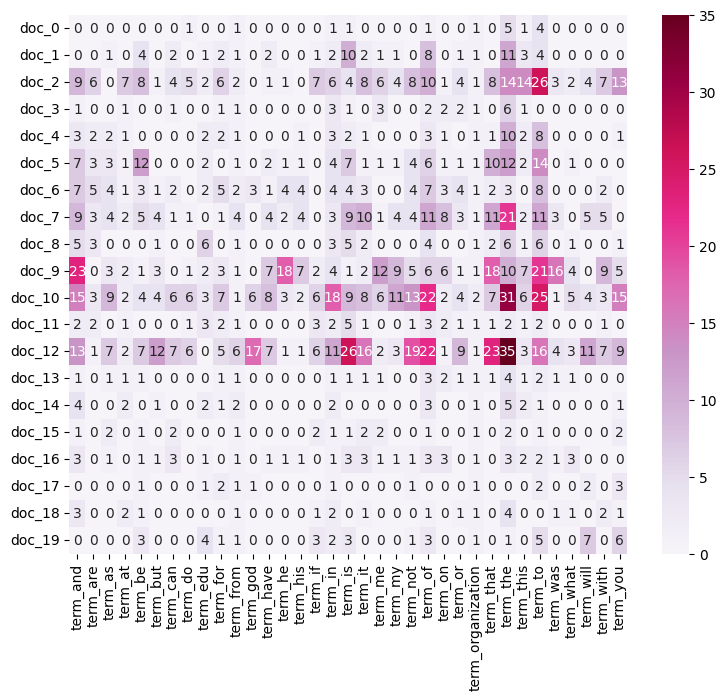

In [172]:
import seaborn as sns

df_todraw = pd.DataFrame(exercise_z, columns = exercise_x, index = exercise_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, annot=True)

In [173]:
from sklearn.decomposition import PCA

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

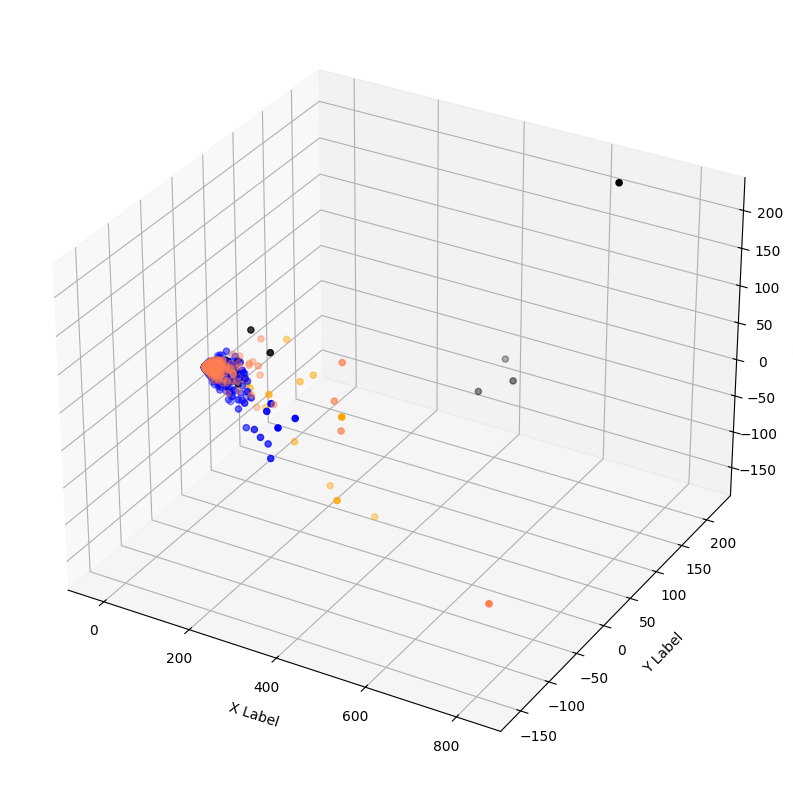

In [174]:
# Answer here
X_3D = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']

# first angle
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = X_3D[X['category_name'] == category].T[0]
    ys = X_3D[X['category_name'] == category].T[1]
    zs = X_3D[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

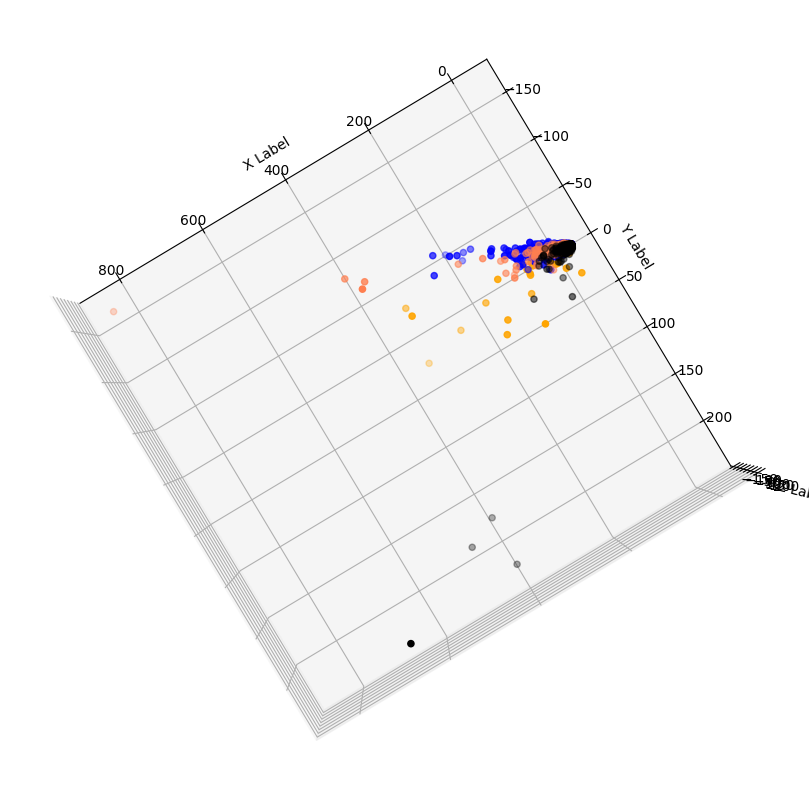

In [175]:
# second angle
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = X_3D[X['category_name'] == category].T[0]
    ys = X_3D[X['category_name'] == category].T[1]
    zs = X_3D[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(90, 60) 
plt.show()

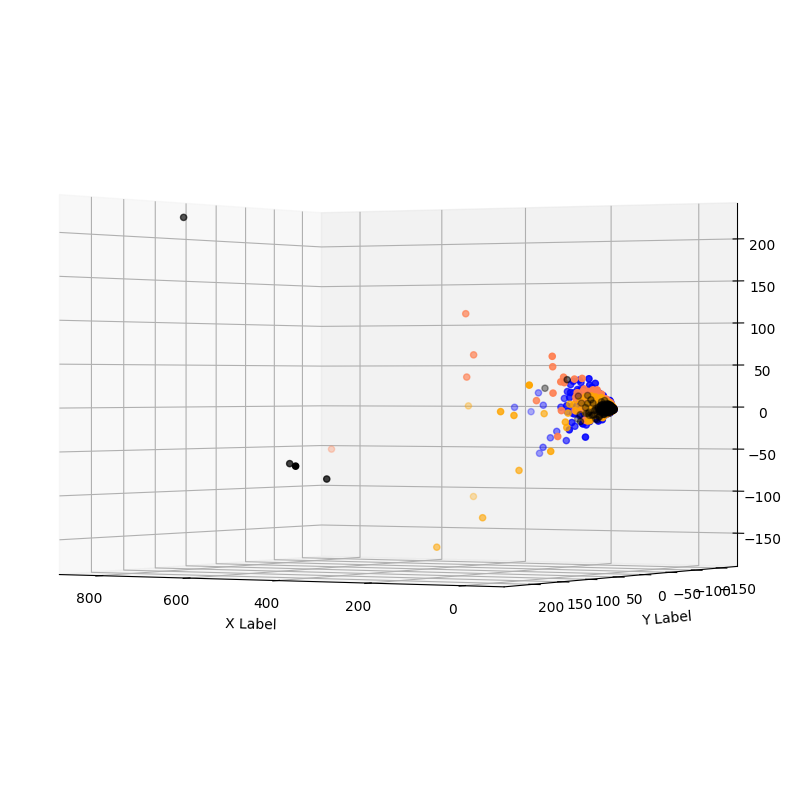

In [176]:
# third angle
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = X_3D[X['category_name'] == category].T[0]
    ys = X_3D[X['category_name'] == category].T[1]
    zs = X_3D[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(0, 120) 
plt.show()

In [177]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [178]:
# Answer here
import plotly.express as px
fig = px.bar(data_frame=term_frequencies[:300], 
             x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


Ans: 如果頻率>10才畫出來就能有效減少，因為很多的term只有出現1次

In [179]:
# Answer here
show_list = []
for i in range(300):
    if term_frequencies[i] > 9:
        show_list.append(i)

import plotly.express as px
fig = px.bar(data_frame=[term_frequencies[i] for i in show_list], 
             x=[count_vect.get_feature_names_out()[i]for i in show_list], 
             y=[term_frequencies[i] for i in show_list])
fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

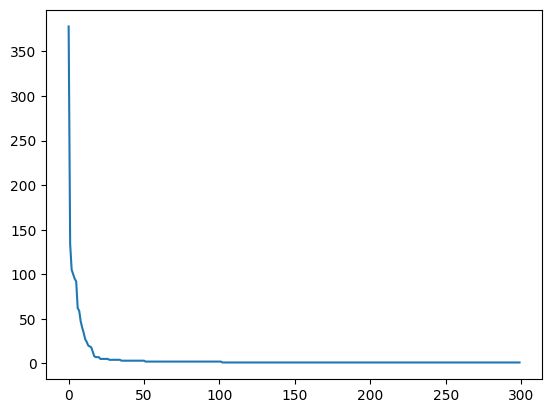

In [180]:
# Answer here
sort_freq = sorted(term_frequencies[:300].copy(), reverse= True)
plt.plot(sort_freq)

In [181]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [182]:
mlb = preprocessing.LabelBinarizer()

In [183]:
mlb.fit(X.category)

LabelBinarizer()

In [184]:
X['bin_category'] = mlb.transform(X['category']).tolist()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

Ans: 可以，效果和category一樣

In [185]:
# Answer here
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]","[0, 0, 1, 0]"


# Second

## read files

In [186]:
import pandas as pd
file_path = ['data/sentiment labelled sentences/amazon_cells_labelled.txt',
             'data/sentiment labelled sentences/imdb_labelled.txt',
             'data/sentiment labelled sentences/yelp_labelled.txt']
content = []
for path in file_path:
    with open(path, 'r', encoding='utf-8') as file:
        file_content = file.readlines()
    print(len(file_content))
    for i in range(len(file_content)):
        file_content[i] = file_content[i].replace('\n','')
        file_content[i] = file_content[i].split('\t')
    content = content + file_content
print(len(content))
sentiment_df = pd.DataFrame(content,columns=["text","score"])

1000
1000
1000
3000


score = 1 for positive, score = 0 for negetive

In [187]:
sentiment_df[:10]

,text,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


## add column

In [188]:
sentiment_df['positive'] = sentiment_df.score.apply(lambda t: True if t=='1' else False)
sentiment_df[:10]

,text,score,positive
0,So there is no way for me to plug it in here i...,0,False
1,"Good case, Excellent value.",1,True
2,Great for the jawbone.,1,True
3,Tied to charger for conversations lasting more...,0,False
4,The mic is great.,1,True
5,I have to jiggle the plug to get it to line up...,0,False
6,If you have several dozen or several hundred c...,0,False
7,If you are Razr owner...you must have this!,1,True
8,"Needless to say, I wasted my money.",0,False
9,What a waste of money and time!.,0,False


## 檢查有沒有missing value

In [189]:
sentiment_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,positive
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


沒有missing value

## 檢查有沒有重複資料

In [190]:
sum(sentiment_df.duplicated())

17

刪除重複資料

In [191]:
sentiment_df.drop_duplicates(keep='first', inplace=True)

刪掉了17筆

In [192]:
len(sentiment_df)

2983

重整index

In [193]:
sentiment_df.index = range(len(sentiment_df))
sentiment_df[-5:]

,text,score,positive
2978,I think food should have flavor and texture an...,0,False
2979,Appetite instantly gone.,0,False
2980,Overall I was not impressed and would not go b...,0,False
2981,"The whole experience was underwhelming, and I ...",0,False
2982,"Then, as if I hadn't wasted enough of my life ...",0,False


## Sampling

In [194]:
sentiment_sample = sentiment_df.sample(n=1000,random_state=42) #random state
display(sentiment_sample)
print(sentiment_sample.positive.value_counts())

,text,score,positive
2410,We've tried to like this place but after 10+ t...,0,False
1547,The script is a big flawed mess.,0,False
881,It was that loud.Glad to say that the Plantron...,1,True
331,The reception is excellent!,1,True
1837,Now imagine that every single one of those dec...,0,False
...,...,...,...
916,It looses connection to the phone even when it...,0,False
1211,There are the usual Hitchcock logic flaws.,0,False
2711,Awesome selection of beer.,1,True
2457,"Very good, though!",1,True


positive
False    506
True     494
Name: count, dtype: int64


positive
False    1493
True     1490
Name: count, dtype: int64


<Axes: title={'center': 'Positive'}, xlabel='positive'>

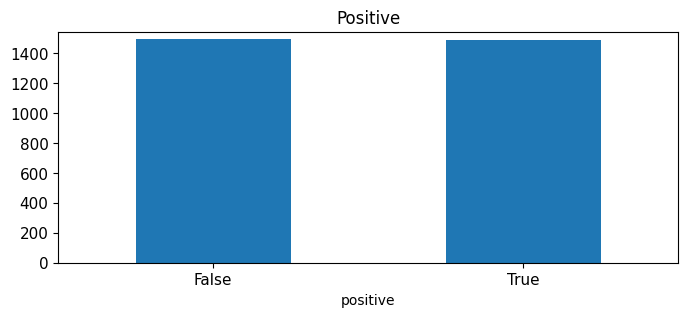

In [195]:
import matplotlib.pyplot as plt
%matplotlib inline

print(sentiment_df.positive.value_counts())
upper_bound = max(sentiment_df.positive.value_counts()+ 50) #277 + 50

sentiment_df.positive.value_counts().plot(kind = 'bar',
                                    title = 'Positive',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

比較sample前後的分布

Text(0.5, 1.0, 'Positive distribution')

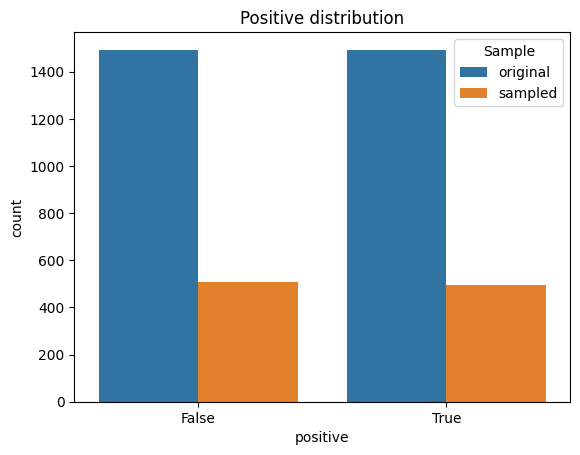

In [196]:
import seaborn as sns
origin = sentiment_df.copy()
sample = sentiment_sample.copy()
origin['Sample'] = 'original'
sample['Sample'] = 'sampled'
df_combine = pd.concat([origin, sample])
ax = sns.countplot(data=df_combine,x="positive", hue="Sample")
ax.set_title('Positive distribution')

兩邊的分布相差不大

## Feature creation

In [197]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [198]:
sentiment_df['unigrams'] = sentiment_df['text'].apply(lambda x: dmh.tokenize_text(x))

In [199]:
sentiment_df[:5]

,text,score,positive,unigrams
0,So there is no way for me to plug it in here i...,0,False,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,True,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,True,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,False,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,True,"[The, mic, is, great, .]"


## Feature subset selection

In [200]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
sentiment_counts = count_vect.fit_transform(sentiment_df.text) #learn the vocabulary and return document-term matrix
print(sentiment_counts.shape)

(2983, 5155)


In [201]:
count_vect.get_feature_names_out()[3000]

'naughty'

In [202]:
analyze = count_vect.build_analyzer()
analyze(sentiment_df.text[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

畫圖

In [203]:
import numpy as np
exercise_z = np.array(sentiment_counts[0:20, :].toarray()) #X_counts[how many documents, how many terms]
not_sparse_list = []
sum_of_columns = np.sum(exercise_z, axis=0)
for i in range(sentiment_counts.shape[1]):
    if sum_of_columns[i] > 1:
        not_sparse_list.append(i)
print(not_sparse_list)
exercise_z = exercise_z[:, not_sparse_list]
exercise_x = ["term_"+count_vect.get_feature_names_out()[i] for i in not_sparse_list]
exercise_y = ["doc_"+ str(i) for i in range(20)]
print(exercise_x)

[216, 412, 647, 1829, 1883, 1954, 1993, 2023, 2113, 2282, 2314, 2427, 2432, 2918, 3063, 3097, 3124, 3387, 3568, 4004, 4161, 4201, 4529, 4531, 4609, 4890, 4987, 5138]
['term_and', 'term_battery', 'term_by', 'term_for', 'term_from', 'term_get', 'term_good', 'term_great', 'term_have', 'term_if', 'term_in', 'term_is', 'term_it', 'term_money', 'term_not', 'term_of', 'term_one', 'term_plug', 'term_quality', 'term_several', 'term_so', 'term_sound', 'term_that', 'term_the', 'term_to', 'term_very', 'term_way', 'term_you']


,term_and,term_battery,term_by,term_for,term_from,term_get,term_good,term_great,term_have,term_if,...,term_quality,term_several,term_so,term_sound,term_that,term_the,term_to,term_very,term_way,term_you
doc_0,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
doc_1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
doc_3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
doc_4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
doc_5,0,0,0,0,0,2,0,0,1,0,...,0,0,0,0,0,1,4,0,0,0
doc_6,0,0,1,0,0,0,0,0,1,1,...,0,2,0,0,0,1,0,0,0,1
doc_7,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,2
doc_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
doc_9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


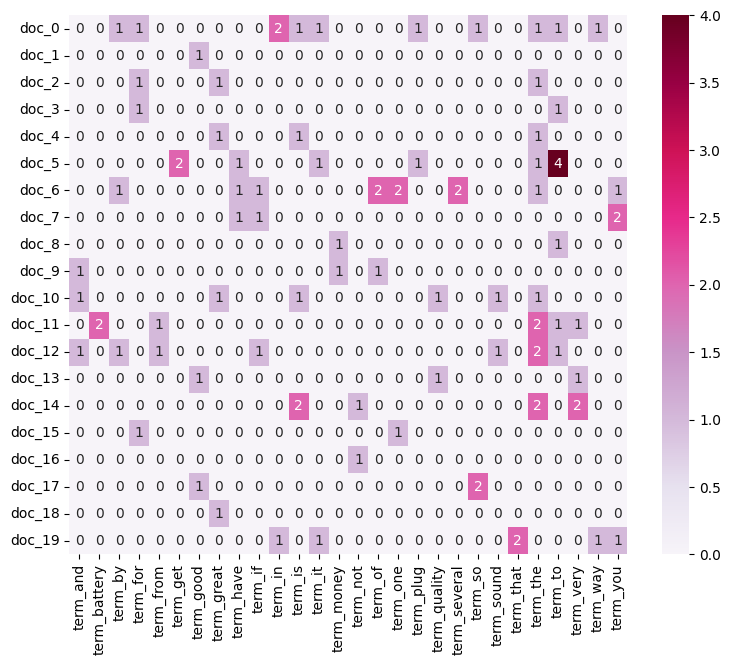

In [204]:
import seaborn as sns

df_todraw = pd.DataFrame(exercise_z, columns = exercise_x, index = exercise_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0,vmax=4,annot=True)

## Dimensionality Reduction

2d

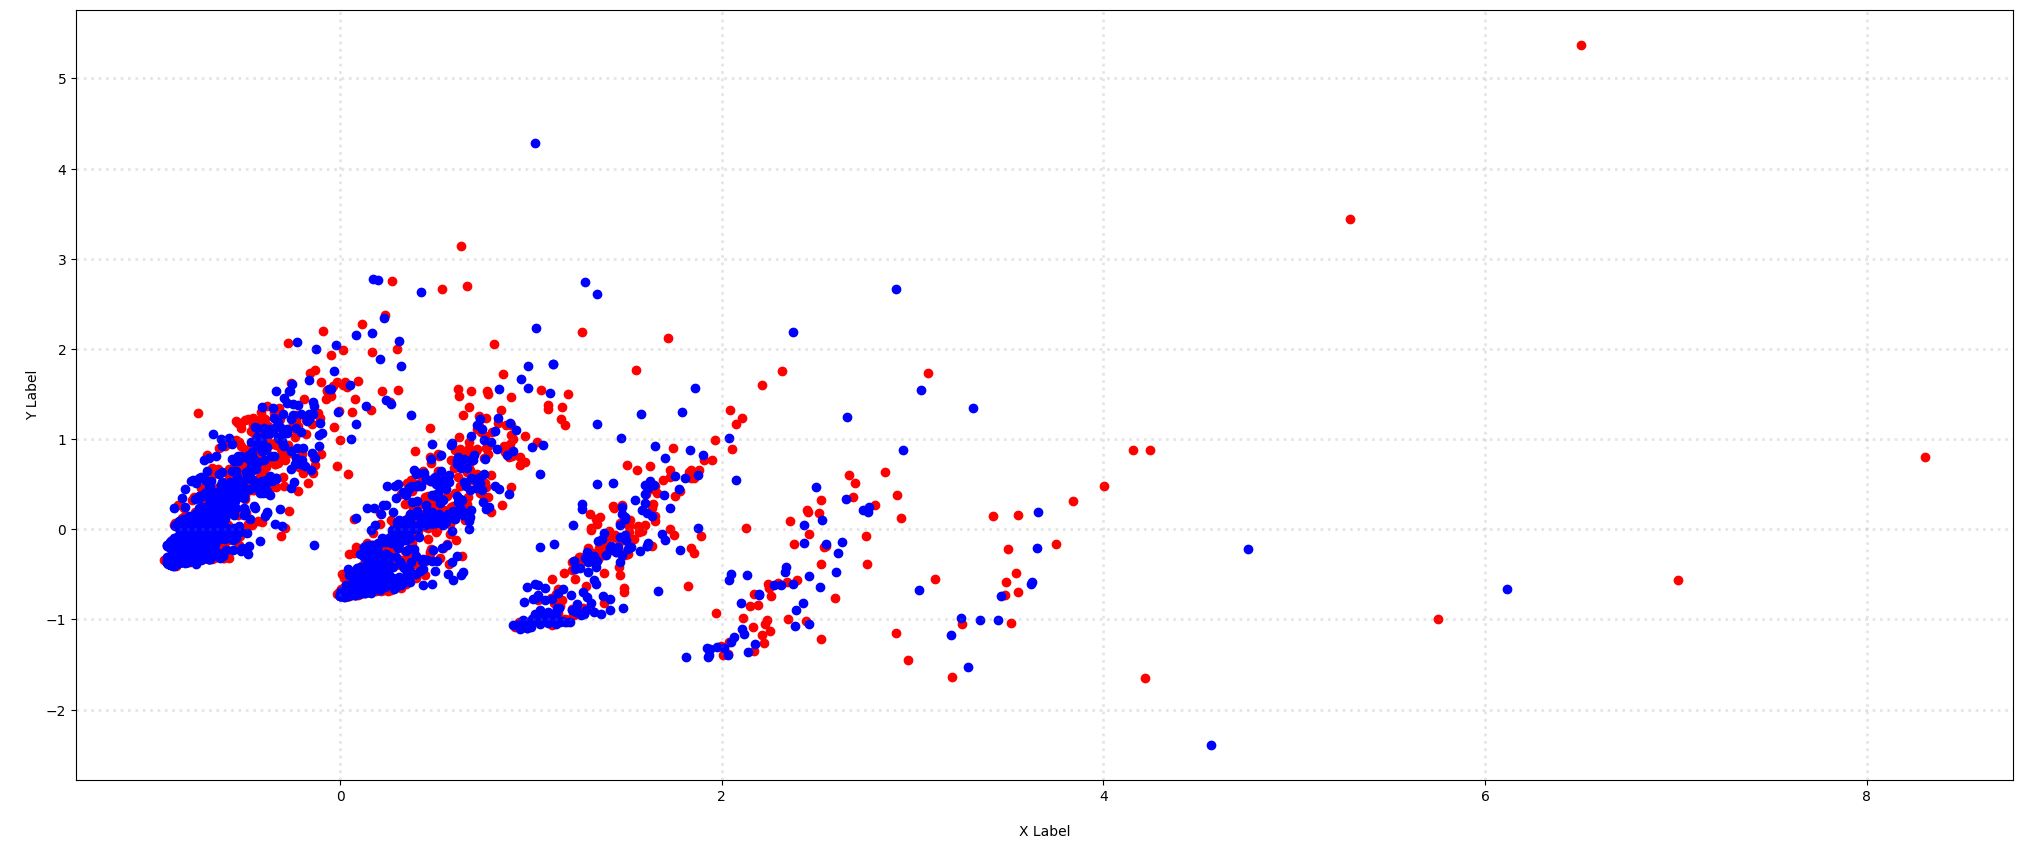

In [205]:
from sklearn.decomposition import PCA
s_reduced = PCA(n_components = 2).fit_transform(sentiment_counts.toarray())
color = ['red', 'blue']
categories = [True, False]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(color, categories):
    xs = s_reduced[sentiment_df['positive'] == category].T[0]
    ys = s_reduced[sentiment_df['positive'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

3d

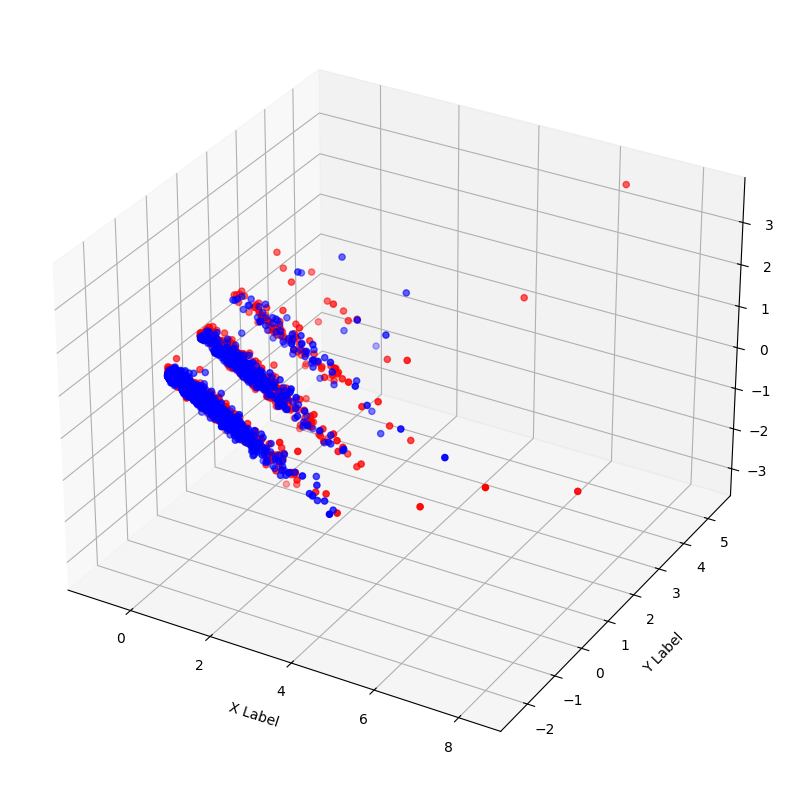

In [206]:
from sklearn.decomposition import PCA
s_reduced = PCA(n_components = 3).fit_transform(sentiment_counts.toarray())
color = ['red', 'blue']
categories = [True, False]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(color, categories):
    xs = s_reduced[sentiment_df['positive'] == category].T[0]
    ys = s_reduced[sentiment_df['positive'] == category].T[1]
    zs = s_reduced[sentiment_df['positive'] == category].T[2]
   
    ax.scatter(xs, ys,zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')


plt.show()

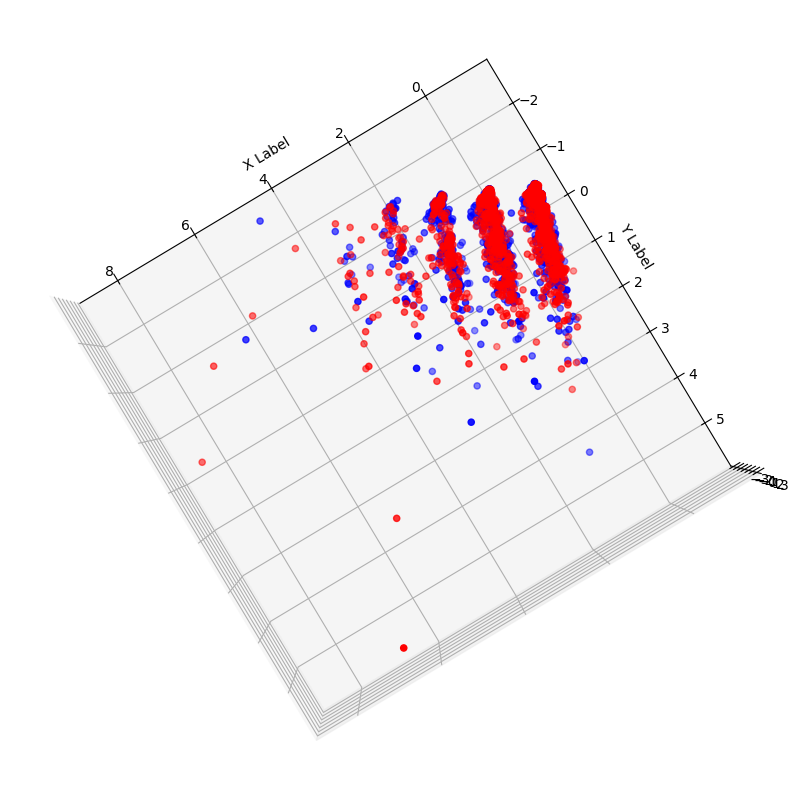

In [207]:
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(color, categories):
    xs = s_reduced[sentiment_df['positive'] == category].T[0]
    ys = s_reduced[sentiment_df['positive'] == category].T[1]
    zs = s_reduced[sentiment_df['positive'] == category].T[2]
   
    ax.scatter(xs, ys,zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.view_init(90, 60) 

plt.show()

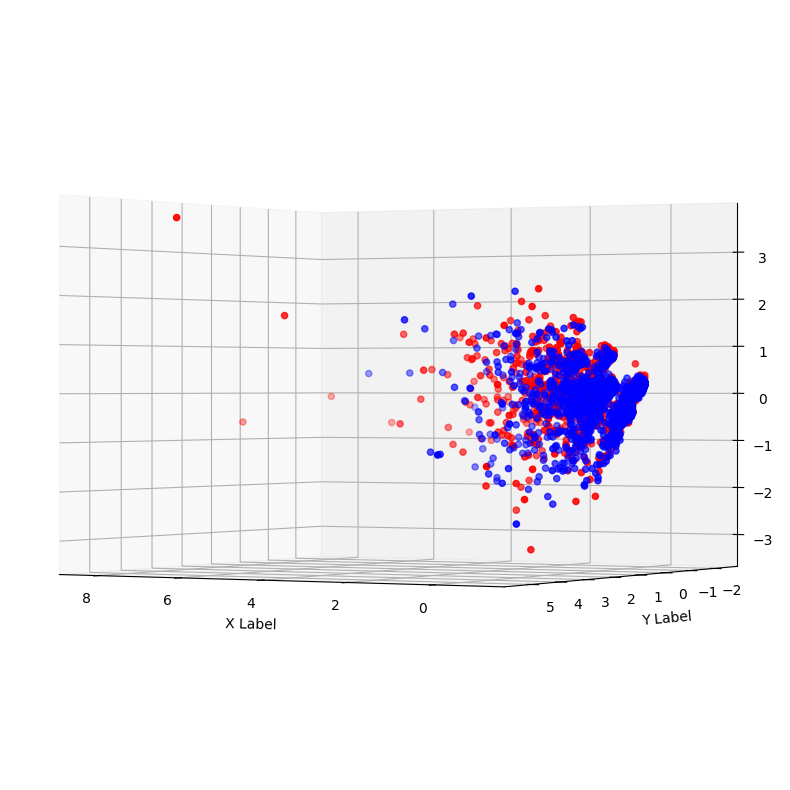

In [208]:
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(color, categories):
    xs = s_reduced[sentiment_df['positive'] == category].T[0]
    ys = s_reduced[sentiment_df['positive'] == category].T[1]
    zs = s_reduced[sentiment_df['positive'] == category].T[2]
   
    ax.scatter(xs, ys,zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.view_init(0, 120) 

plt.show()

## Attribute Transformation / Aggregation

In [209]:
term_frequencies = np.asarray(sentiment_counts.sum(axis=0))[0]

畫圖

In [210]:
show_list = []
for i in range(300):
    if term_frequencies[i] > 9:
        show_list.append(i)

import plotly.express as px
fig = px.bar(data_frame=[term_frequencies[i] for i in show_list], 
             x=[count_vect.get_feature_names_out()[i]for i in show_list], 
             y=[term_frequencies[i] for i in show_list])
fig.show()

long tail plot

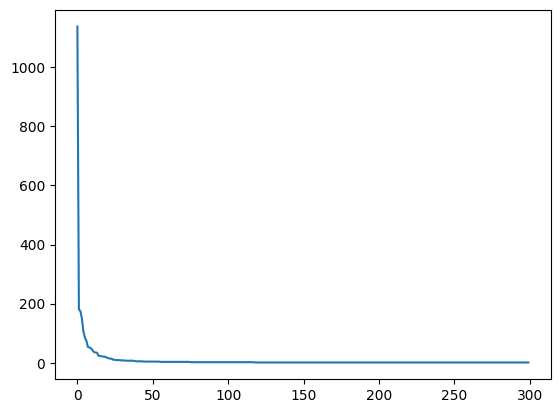

In [211]:
sort_freq = sorted(term_frequencies[:300].copy(), reverse= True)
plt.plot(sort_freq)

C:\Users\user\AppData\Local\Temp\ipykernel_24288\1525322602.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


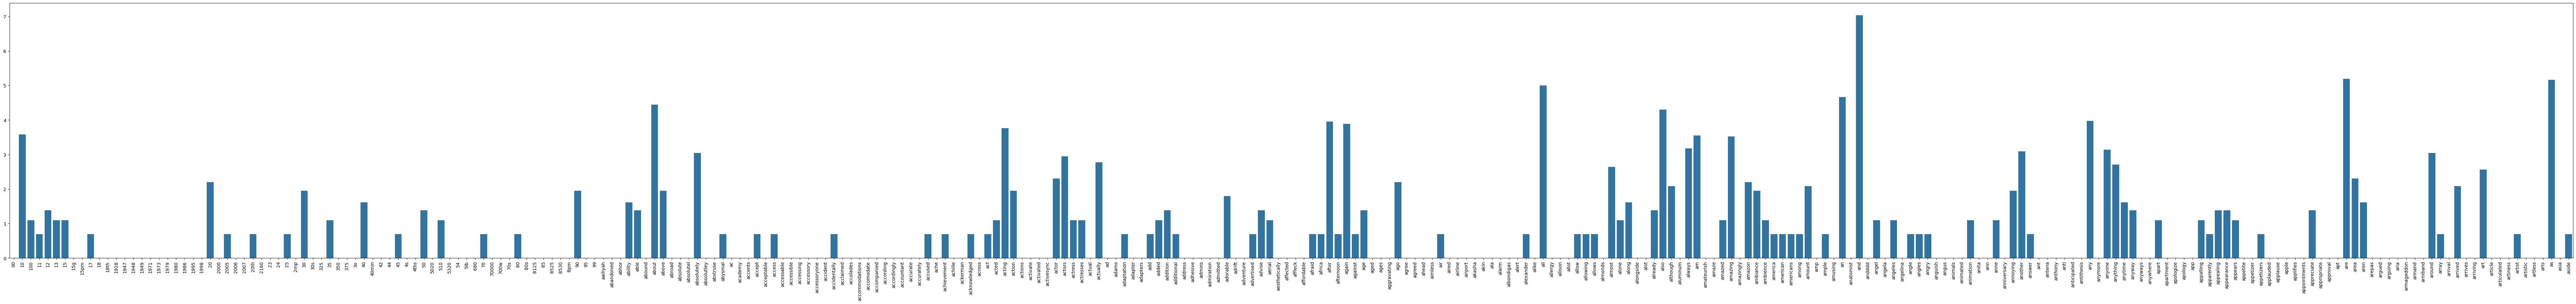

In [212]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

## Discretization and Binarization

In [213]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(sentiment_df.score)
sentiment_df['bin_score'] = mlb.transform(sentiment_df['score']).tolist()

In [214]:
sentiment_df[:5]

,text,score,positive,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,False,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,True,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,True,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,False,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,True,"[The, mic, is, great, .]",[1]


# Third

## tf-idf

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(sentiment_df.text)
print(tfidf[0]) #sparse matrix

  (0, 1013)	0.39845543988934873
  (0, 647)	0.2233655373587691
  (0, 1982)	0.2314910330235545
  (0, 4793)	0.3319671168188344
  (0, 4835)	0.2754374241479848
  (0, 4531)	0.08660987696634037
  (0, 2158)	0.22274667474668547
  (0, 2314)	0.29538734318239734
  (0, 2432)	0.11967447562998453
  (0, 3387)	0.30868158568324194
  (0, 4609)	0.12743956571028017
  (0, 2809)	0.2286268276414034
  (0, 1829)	0.15641232030594823
  (0, 4987)	0.24912754996231995
  (0, 3043)	0.2233655373587691
  (0, 2427)	0.12068879835601415
  (0, 4545)	0.20758518394408282
  (0, 4161)	0.1873972955866557


In [216]:
type(sentiment_counts.toarray())

numpy.ndarray

## Naive Bayes classifier

用sample train classifier 再用剩下的看準度

In [217]:
sample = sentiment_df.sample(n=2000,random_state=42)
sample[:5]

,text,score,positive,unigrams,bin_score
2410,We've tried to like this place but after 10+ t...,0,False,"[We, 've, tried, to, like, this, place, but, a...",[0]
1547,The script is a big flawed mess.,0,False,"[The, script, is, a, big, flawed, mess, .]",[0]
881,It was that loud.Glad to say that the Plantron...,1,True,"[It, was, that, loud.Glad, to, say, that, the,...",[1]
331,The reception is excellent!,1,True,"[The, reception, is, excellent, !]",[1]
1837,Now imagine that every single one of those dec...,0,False,"[Now, imagine, that, every, single, one, of, t...",[0]


In [252]:
ma = tfidf.toarray()
mb = sentiment_counts.toarray()
print(ma.shape)
sample_counts = [ mb[i] for i in sample.index]

df = np.sum(np.asarray(sample_counts), axis=0)
print(len(df))
idf = np.log(len(sample_counts)/ (df+1))
sample_tfidf = sample_counts*idf
print(len(sample_tfidf),len(sample_tfidf[0]))


(2983, 5155)
5155
2000 5155


In [253]:
from sklearn.naive_bayes import MultinomialNB

scores = []
for s in sample['bin_score']:
    scores = scores + s
print(scores)
test_index = []
for i in range(len(sentiment_df)):
    if i not in sample.index:
        test_index.append(i)
test_data =[ mb[i] for i in test_index]


[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 

term frequency

In [254]:
mnb_term = MultinomialNB()
mnb_term.fit(sample_counts,scores)
term_pred = mnb_term.predict(test_data)
print(term_pred[:10])

[1 0 1 0 0 1 1 1 0 0]


tfidf

In [255]:
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(sample_tfidf,scores)
tfidf_pred = mnb_tfidf.predict(test_data)
print(tfidf_pred[:10])

[1 0 1 0 0 1 1 1 1 0]


evaluation

In [257]:
answer = []
for i in test_index:
    answer = answer + sentiment_df['bin_score'][i]
term_acc = 0
term_TT = 0
tfidf_acc = 0
tfidf_TT = 0
for i in range(len(answer)):
    if answer[i] == term_pred[i]:
        term_acc += 1
        if answer[i] == 1:
            term_TT += 1
    if answer[i] == tfidf_pred[i]:
        tfidf_acc += 1
        if answer[i] == 1:
            tfidf_TT += 1
print("accuracy of term: " + str(term_acc/len(answer)))
print("accuracy of tfidf: "+ str(tfidf_acc/len(answer)))
print("precision of term: "+str(term_TT/sum(term_pred)))
print("precision of tfidf: "+str( tfidf_TT/sum(tfidf_pred)))
print("recall of term: "+str(term_TT/sum(answer)))
print("recall of tfidf: "+str(tfidf_TT/sum(answer)))

accuracy of term: 0.8301119023397762
accuracy of tfidf: 0.8179043743641913
precision of term: 0.8308026030368764
precision of tfidf: 0.8123667377398721
recall of term: 0.8114406779661016
recall of tfidf: 0.8072033898305084


precision 和 accuracy 都是用 term 的 classifirer比較高

recall 是用 tfidf 的 classifirer比較高

## data visualiztion

long tail plot

In [238]:
 
pairs = list(zip(term_frequencies,count_vect.get_feature_names_out()))
pairs.sort(reverse=True)
pairs[:5]


[(1951, 'the'), (1138, 'and'), (789, 'it'), (752, 'is'), (669, 'to')]

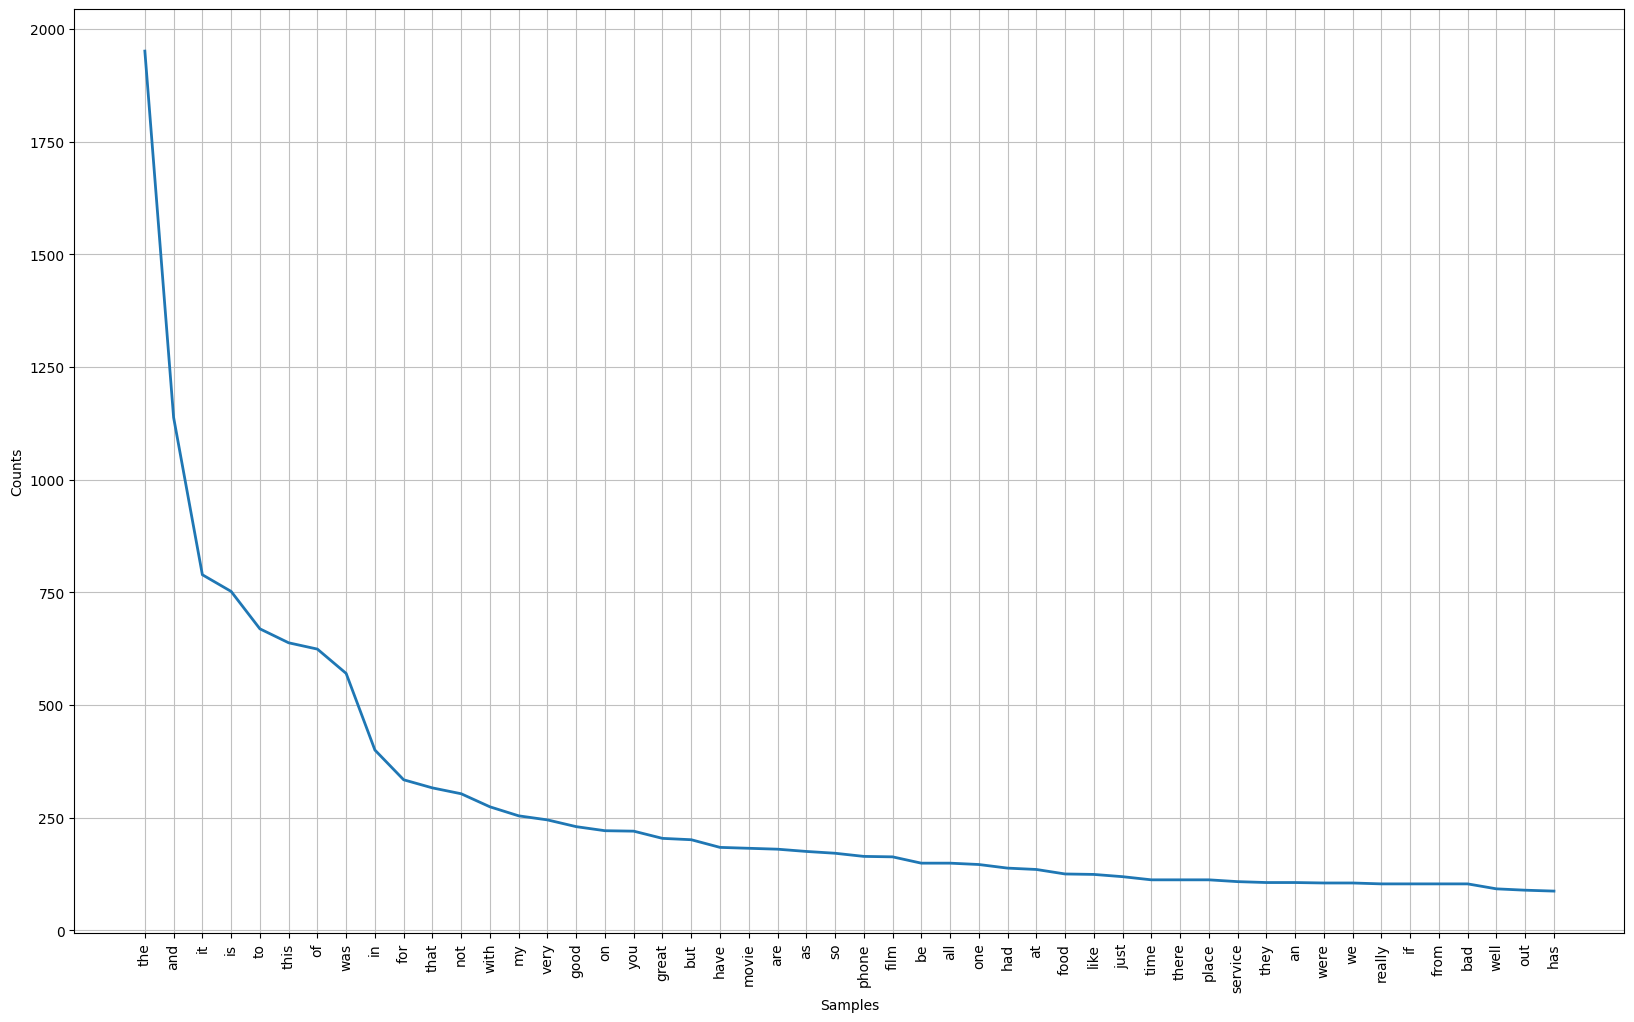

<Axes: xlabel='Samples', ylabel='Counts'>

In [243]:
from nltk import FreqDist
plt.rcParams["figure.figsize"] = (20, 12)
fdist = FreqDist()
for p in pairs[:50]:
    fdist[p[1]] += p[0]
fdist.plot()

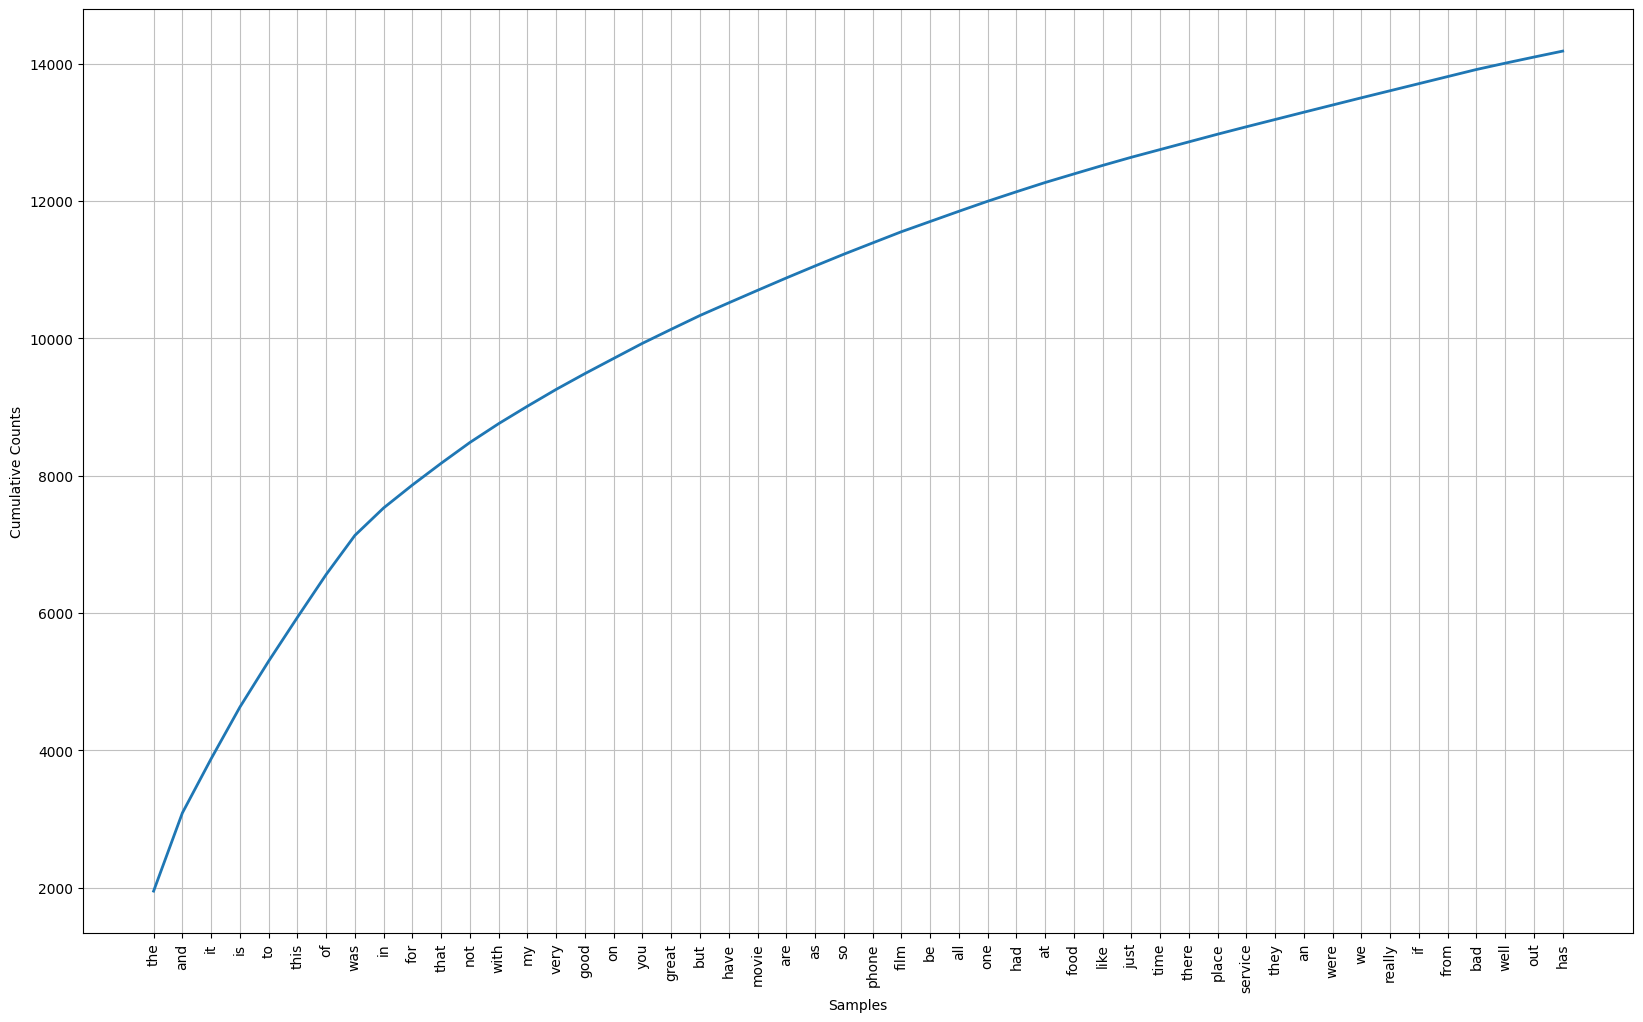

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [244]:
fdist.plot( cumulative=True)

tfidf visualization

In [246]:
import numpy as np
exercise_z = np.array(tfidf[0:20, :].toarray()) #X_counts[how many documents, how many terms]
not_sparse_list = []
sum_of_columns = np.sum(exercise_z, axis=0)
for i in range(sentiment_counts.shape[1]):
    if sum_of_columns[i] > 0:
        not_sparse_list.append(i)
print(not_sparse_list)
exercise_z = exercise_z[:, not_sparse_list[:20]]
exercise_x = ["term_"+count_vect.get_feature_names_out()[i] for i in not_sparse_list[:20]]
exercise_y = ["doc_"+ str(i) for i in range(20)]
print(exercise_x)

[45, 146, 179, 216, 243, 273, 297, 314, 412, 416, 514, 647, 713, 768, 851, 856, 897, 987, 1012, 1013, 1171, 1231, 1338, 1373, 1440, 1441, 1589, 1603, 1610, 1648, 1692, 1824, 1829, 1883, 1893, 1901, 1926, 1954, 1982, 1988, 1993, 2023, 2105, 2113, 2122, 2127, 2158, 2175, 2239, 2259, 2282, 2294, 2305, 2314, 2404, 2427, 2432, 2449, 2464, 2565, 2567, 2648, 2684, 2753, 2758, 2809, 2823, 2853, 2868, 2890, 2918, 2931, 2980, 2982, 3010, 3043, 3063, 3070, 3095, 3097, 3124, 3144, 3152, 3200, 3322, 3351, 3387, 3482, 3568, 3611, 3648, 3777, 3889, 3968, 3979, 4004, 4161, 4201, 4272, 4278, 4526, 4529, 4531, 4538, 4542, 4545, 4558, 4564, 4589, 4593, 4609, 4634, 4730, 4793, 4821, 4835, 4861, 4890, 4928, 4968, 4973, 4974, 4987, 5015, 5017, 5021, 5032, 5079, 5096, 5107, 5138]
['term_45', 'term_advise', 'term_all', 'term_and', 'term_any', 'term_are', 'term_as', 'term_at', 'term_battery', 'term_be', 'term_blue', 'term_by', 'term_case', 'term_charger', 'term_clicks', 'term_clip', 'term_comfortable', 'term_c

,term_45,term_advise,term_all,term_and,term_any,term_are,term_as,term_at,term_battery,term_be,term_blue,term_by,term_case,term_charger,term_clicks,term_clip,term_comfortable,term_contacts,term_conversations,term_converter
doc_0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.223366,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.398455
doc_1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.512627,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
doc_2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
doc_3,0.35888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.277509,0.00000,0.000000,0.000000,0.000000,0.35888,0.000000
doc_4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
doc_5,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
doc_6,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.164425,0.000000,0.000000,0.00000,0.000000,0.000000,0.268841,0.00000,0.000000
doc_7,0.00000,0.000000,0.000000,0.000000,0.000000,0.243432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
doc_8,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
doc_9,0.00000,0.000000,0.000000,0.201132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000


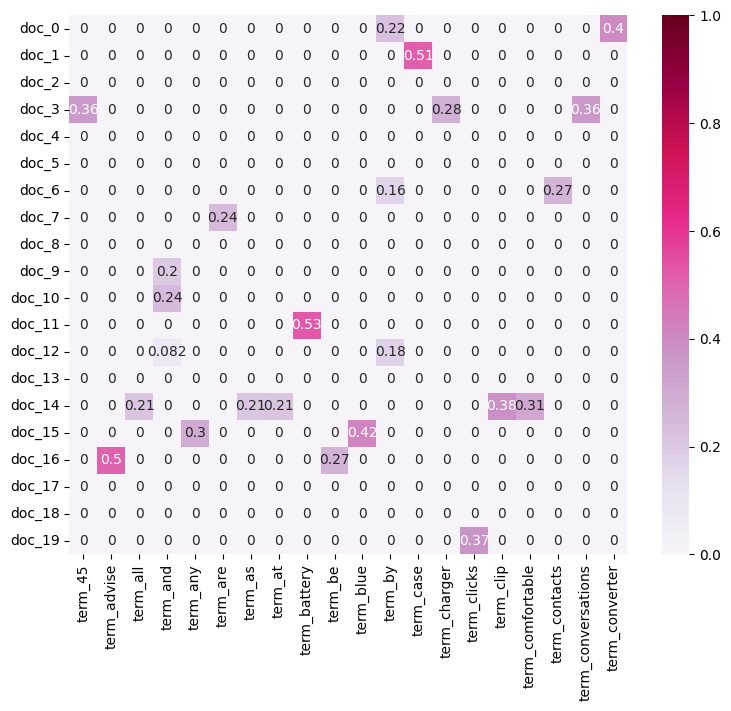

In [248]:
import seaborn as sns

df_todraw = pd.DataFrame(exercise_z, columns = exercise_x, index = exercise_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0,vmax=1,annot=True)

# Fourth

### 5.1 Sampling
在抽樣的時候大部分會抽總數的固定比例

In [ ]:
print(X.shape)
X_sample = X.sample(frac=0.7,random_state=42) #random state
display(X_sample)

### 5.3 Feature subset selection
可以多增加stop words把沒有意義的詞去掉

In [261]:
count_vect.get_feature_names_out()[:5]

array(['000', '0000', '0000001200', '000005102000', '0001'], dtype=object)

In [260]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words=['00', '10', '100', '11', '12'])
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(count_vect.get_feature_names_out()[:5])

(2257, 35783)
['000' '0000' '0000001200' '000005102000' '0001']


### 6. Data Exploration
比較前100個row的相似度

In [269]:
from sklearn.metrics.pairwise import cosine_similarity

Max = -1
similar_pair = (0,0)
for i in range(100):
    for j in range(i+1,100):
        sim = cosine_similarity(tfidf[i],tfidf[j])
        if sim > Max:
            Max = sim
            similar_pair = (i,j)
print("row "+str(similar_pair[0])+" :"+sentiment_df['text'][similar_pair[0]])
print("row "+str(similar_pair[1])+" :"+sentiment_df['text'][similar_pair[1]])

row 18 :Works great!.
row 86 :This phone works great.
